# Anomaly Detection & Outliers

An anomaly in data science is defined as a data point that stands out from the rest of the data points in a dataset. Anomalies typically deviate from the data’s “normal” behavior patterns. For example, if a school’s student population has been steadily increasing by ~10% for the past 10 years, a sudden 50% increase in year 5 would be considered an anomaly. 
 
Anomalies and outliers are commonly interpreted to be the same thing. However, an anomaly should not be confused with an outlier. An outlier is an actual data point that strays far away from a distribution’s mean or median. An anomaly is a false data point in the data set that has been identified by a different process than the rest of the points in the data set. Anomalies are not extreme values, rather errors that should be actioned upon according to the organization or company’s policy.

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# download data from https://github.com/datasciencedojo/datasets/blob/master/titanic.csv
titanic=pd.read_csv('titanic.csv')
titanic.head()

pclass  survived                                             name     sex  \
0     1.0       1.0                    Allen, Miss. Elisabeth Walton  female   
1     1.0       1.0                   Allison, Master. Hudson Trevor    male   
2     1.0       0.0                     Allison, Miss. Helen Loraine  female   
3     1.0       0.0             Allison, Mr. Hudson Joshua Creighton    male   
4     1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

       age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.0000    0.0    0.0   24160  211.3375       B5        S    2    NaN   
1   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11    NaN   
2   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  
3  Montreal, PQ / Chesterville, ON  
4  Montreal, PQ / Chesterville, ON

In [11]:
# filling na values
titanic['age'].fillna(titanic['age'].mode()[0], inplace=True)
titanic['fare'].fillna(titanic['fare'].median(), inplace=True)
titanic['cabin'].fillna(titanic['cabin'].mode()[0], inplace=True)
titanic['boat'].fillna(titanic['boat'].mode()[0], inplace=True)
titanic['body'].fillna(titanic['body'].mode()[0], inplace=True)
titanic['sex'].fillna(titanic['sex'].mode()[0], inplace=True)
titanic['survived'].fillna(titanic['survived'].mode()[0], inplace=True)
titanic['home.dest'].fillna(titanic['home.dest'].mode()[0], inplace=True)

## Histograms

Histograms are graphical representations of the distribution of numerical data. They display the frequency or count of data points within specific intervals, or "bins," along the horizontal axis (x-axis), with the height of each bar representing the frequency of data points falling within that bin.

Here's how histograms work and how they can be used to detect outliers:

Construction: To create a histogram, the range of the data is divided into intervals or bins. The number of bins and their width can vary depending on the dataset and the desired level of detail. Then, the frequency of data points falling into each bin is counted, and bars are drawn to represent these frequencies.

Visualization: The resulting histogram provides a visual summary of the distribution of the data, showing where the data points are concentrated and how they are spread across the range of values.

Outlier detection:

Skewness: Histograms can reveal skewness in the data distribution. Skewed distributions have a long tail on one side, indicating that some data points are significantly different from the majority. Outliers can contribute to this skewness, leading to a non-normal distribution.
Tails: Outliers often appear as isolated bars or spikes at the tails of the histogram, indicating extreme values that are uncommon compared to the rest of the data. These outliers can be visually identified by observing bins with significantly higher frequencies than neighboring bins.
Gaps: Histograms may also reveal gaps or breaks in the distribution, where there are no data points present. Such gaps could indicate potential outliers or missing data points that fall outside the observed range.
Unusual peaks: In some cases, outliers may create unusual peaks or clusters in the histogram, especially if they occur in specific regions of the data distribution. These peaks can draw attention to potential outliers that deviate from the typical pattern of the data.
Adjustments: Adjusting the bin width or the number of bins can help in detecting outliers more effectively. Narrower bins can provide finer granularity and reveal outliers that might be obscured in wider bins.

Overall, histograms provide a visual tool for exploring the distribution of data and identifying potential outliers by examining the shape, tails, gaps, and unusual peaks in the histogram. They are particularly useful in exploratory data analysis to gain insights into the underlying characteristics of the dataset and to guide further analysis and outlier detection techniques.


Text(0, 0.5, 'Frequency')

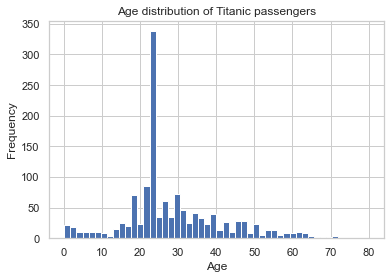

In [12]:
# visualizing the age variable of the Titanic dataset

plt.hist(titanic['age'], bins=50)
plt.title("Age distribution of Titanic passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")

## Z-Scores

Z-scores, also called standard scores, are a statistical measure used to determine how far individual data points are from the mean of a dataset, expressed in terms of standard deviations. They are particularly useful for identifying outliers within a dataset.

Here's a simplified explanation:

Calculation: To calculate the z-score for a data point:

Subtract the mean of the dataset from the data point.
Divide the result by the standard deviation of the dataset.
This gives you a numerical value representing how many standard deviations the data point is away from the mean.

Interpretation:

A positive z-score indicates that the data point is above the mean.
A negative z-score indicates that the data point is below the mean.
The magnitude of the z-score indicates how far the data point deviates from the mean in terms of standard deviations.
Standardization: Z-scores standardize data, making it possible to compare values from different datasets regardless of their original units of measurement. They have a mean of 0 and a standard deviation of 1.

Outlier detection: Z-scores are commonly used to identify outliers within a dataset. Outliers are data points that have unusually high or low z-scores, indicating that they deviate significantly from the mean. Typically, data points with z-scores beyond a certain threshold (e.g., 2 or -2) are considered outliers.

Normal distribution: In a normally distributed dataset:

About 68% of the data falls within one standard deviation of the mean.
About 95% falls within two standard deviations.
About 99.7% falls within three standard deviations.
Z-scores play a crucial role in statistics and data analysis, providing a standardized method for identifying outliers and understanding the distribution of data within a dataset.

In [13]:
from scipy.stats import zscore
titanic["age_zscore"] = zscore(titanic["age"])
titanic["outlier"] = titanic["age_zscore"].apply(
  lambda x: x > 3
)
titanic[titanic["outlier"]]

pclass  survived                                               name  \
9        1.0       0.0                            Artagaveytia, Mr. Ramon   
14       1.0       1.0               Barkworth, Mr. Algernon Henry Wilson   
61       1.0       1.0  Cavendish, Mrs. Tyrell William (Julia Florence...   
81       1.0       0.0                       Crosby, Capt. Edward Gifford   
135      1.0       0.0                          Goldschmidt, Mr. George B   
506      2.0       0.0                        Mitchell, Mr. Henry Michael   
727      3.0       0.0                               Connors, Mr. Patrick   
1235     3.0       0.0                                Svensson, Mr. Johan   

         sex   age  sibsp  parch      ticket     fare        cabin embarked  \
9       male  71.0    0.0    0.0    PC 17609  49.5042  C23 C25 C27        C   
14      male  80.0    0.0    0.0       27042  30.0000          A23        S   
61    female  76.0    1.0    0.0       19877  78.8500          C46        S   
81      male  70.0    1.0    1.0   WE/P 5735  71.0000          B22        S   
135     male  71.0    0.0    0.0    PC 17754  34.6542           A5        C   
506     male  70.0    0.0    0.0  C.A. 24580  10.5000  C23 C25 C27        S   
727     male  70.5    0.0    0.0      370369   7.7500  C23 C25 C27        Q   
1235    male  74.0    0.0    0.0      347060   7.7750  C23 C25 C27        S   

     boat   body                                     home.dest  age_zscore  \
9      13   22.0                           Montevideo, Uruguay    3.232342   
14      B    1.0                                 Hessle, Yorks    3.920009   
61      6    1.0                       Little Onn Hall, Staffs    3.614379   
81     13  269.0                                 Milwaukee, WI    3.155935   
135    13    1.0                                  New York, NY    3.232342   
506    13    1.0  Guernsey / Montclair, NJ and/or Toledo, Ohio    3.155935   
727    13  171.0                                  New York, NY    3.194139   
1235   13    1.0                                  New York, NY    3.461564   

      outlier  
9        True  
14       True  
61       True  
81       True  
135      True  
506      True  
727      True  
1235     True

## Boxplots

Box plots, also known as box-and-whisker plots, are graphical representations of the distribution of a dataset. They provide a concise summary of the central tendency, variability, and skewness of the data, as well as identifying potential outliers.

Here's a breakdown of the components of a box plot:

Box: The box in a box plot represents the interquartile range (IQR) of the data, which spans from the first quartile (Q1) to the third quartile (Q3). The length of the box indicates the spread of the middle 50% of the data. The line inside the box represents the median (Q2) of the dataset.

Whiskers: The whiskers extend from the edges of the box to the minimum and maximum values within a specified range. By default, this range is typically 1.5 times the IQR from the first and third quartiles. Any data points beyond the whiskers are considered outliers and plotted individually.

Outliers: Outliers are individual data points that fall outside the whiskers. They are plotted as individual points beyond the whiskers and can indicate potential anomalies or extreme values in the dataset.

Notches: Some box plots include notches in the boxes, which provide a rough guide to the uncertainty about the median. If the notches of two boxes do not overlap, it suggests that the medians may be significantly different.

Box plots are particularly useful for comparing distributions across different groups or categories and identifying variations and outliers within the data. They provide a visual summary of the dataset's central tendency, spread, and skewness, making them valuable tools in exploratory data analysis and statistical inference. Additionally, box plots are robust to outliers and do not assume a specific underlying distribution of the data, making them versatile and widely used in various fields.


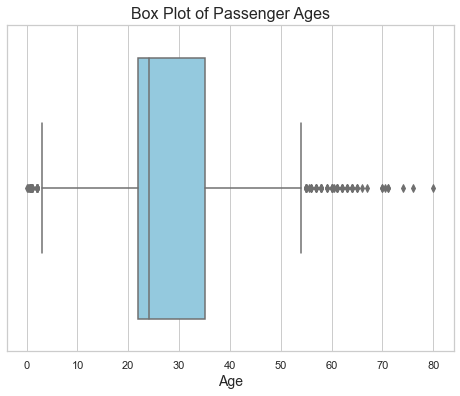

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Create box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=titanic['age'], color='skyblue')

# Add labels and title
plt.xlabel('Age', fontsize=14)
plt.title('Box Plot of Passenger Ages', fontsize=16)

# Show plot
plt.show()


## Support Vector Machines

Support Vector Machines (SVMs) are powerful supervised learning algorithms commonly used for classification and regression tasks. However, they can also be adapted for outlier detection or anomaly detection tasks. Here's how SVMs work in the context of outlier detection and how they can be applied to the Titanic dataset:

SVMs for Outlier Detection:

SVMs can be used for outlier detection by training a model to distinguish between normal data points and outliers. This is typically achieved using a variant known as One-Class SVM.
One-Class SVM learns a decision boundary that encloses the majority of the data points in the feature space, assuming that the dataset contains primarily normal instances and that outliers are rare.
Data points falling outside this decision boundary are classified as outliers or anomalies.
Application to the Titanic Dataset:

In the context of the Titanic dataset, SVMs can be used to detect outliers or anomalies in features such as passenger age and fare.
For example, you might use One-Class SVM to identify unusual combinations of age and fare values that deviate significantly from the majority of passengers.
Anomalies detected in this manner could represent passengers with unusual characteristics, such as exceptionally high or low fares compared to others in their age group.
Model Training and Evaluation:

To apply SVMs for outlier detection on the Titanic dataset, you would first select relevant features (e.g., age and fare) and prepare the data accordingly.
Next, you would train a One-Class SVM model on the selected features using appropriate hyperparameters.
After training, you would evaluate the model's performance by assessing its ability to correctly identify outliers in the dataset.
Evaluation metrics such as precision, recall, and F1-score may be used to measure the model's effectiveness in detecting anomalies.
Interpretation and Visualization:

Once the model is trained and evaluated, you can interpret the results by examining the outliers identified by the SVM.
Visualization techniques such as scatter plots or histograms can help visualize the distribution of data points and highlight the outliers detected by the SVM.
In summary, SVMs can be valuable tools for detecting outliers and anomalies in datasets like the Titanic dataset. By leveraging One-Class SVM, you can train models to identify instances that deviate significantly from the norm, potentially providing insights into unusual patterns or observations within the data.

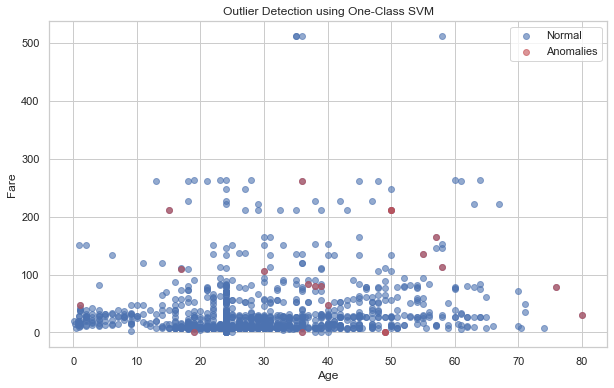

In [15]:
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'titanic' is your DataFrame containing 'age' and 'fare' columns

# Selecting relevant features
df = titanic[["age", "fare"]]

# Fitting One-Class SVM model
model = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.01).fit(df)

# Predicting outliers
y_pred = model.predict(df)

# Extracting anomaly values
anomaly_values = df.iloc[np.where(y_pred == -1)]

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df.age, df.fare, label='Normal', alpha=0.6)  # Plot normal data points
plt.scatter(anomaly_values["age"], anomaly_values["fare"], c='r', label='Anomalies', alpha=0.6)  # Plot anomalies in red
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Outlier Detection using One-Class SVM')
plt.legend()
plt.show()


## Isolation Forests

Isolation Forests are an ensemble-based anomaly detection algorithm designed to identify outliers or anomalies in datasets. They work by partitioning the feature space using randomly selected feature thresholds, aiming to isolate instances that are unusual or significantly different from the majority of the data. Here's how Isolation Forests detect outliers and an example with the Titanic dataset:

Partitioning and Isolation:

Isolation Forests build an ensemble of decision trees, where each tree is grown recursively by randomly selecting a feature and a split value.
The trees partition the feature space into smaller regions, isolating instances that require fewer splits to separate from the majority of the data.
Outliers are expected to be isolated into smaller partitions more quickly than normal instances due to their uniqueness or rarity.
Path Length and Anomaly Score:

During the training process, Isolation Forests measure the average path length from the root to each instance in the decision trees.
Instances that have shorter average path lengths are considered more likely to be outliers, as they require fewer splits to isolate from the rest of the data.
An anomaly score is computed for each instance based on its average path length, where lower scores indicate higher likelihood of being an outlier.
Detection of Outliers:

Isolation Forests identify outliers based on their anomaly scores, with lower scores indicating instances that are more likely to be outliers.
By setting a threshold on the anomaly scores, you can classify instances with scores below the threshold as outliers.
Example with Titanic Dataset:

Suppose you have the Titanic dataset, containing features such as passenger age and fare.
You can apply an Isolation Forest to detect outliers in the distribution of ages and fares, which may represent unusual or rare cases among the passengers.
For instance, passengers with exceptionally high fares compared to their age group or those with unusually low fares may be identified as outliers by the Isolation Forest.
Model Evaluation:

After training the Isolation Forest model, you can evaluate its performance by examining the detected outliers and assessing their relevance to the dataset.
Visualization techniques such as scatter plots or histograms can help visualize the distribution of data points and highlight the outliers detected by the Isolation Forest.
In summary, Isolation Forests are effective anomaly detection algorithms that leverage partitioning of the feature space to identify outliers in datasets like the Titanic dataset. They provide a robust approach to detecting anomalies based on their uniqueness and isolation from the majority of the data.

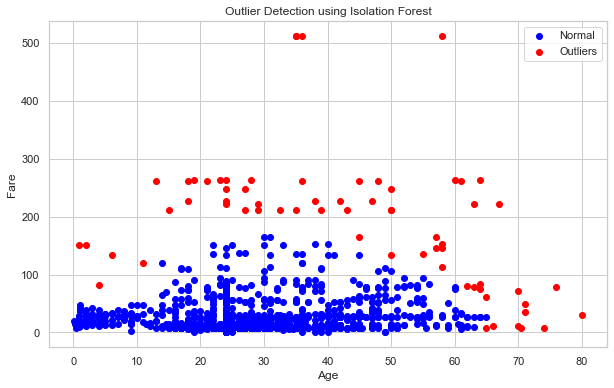

In [16]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt

# Select relevant features (age and fare)
features = titanic[['age', 'fare']]

# Train the Isolation Forest model
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
model.fit(features)

# Predict outliers
outliers = model.predict(features)
outliers_mask = outliers == -1

# Plot the data points and highlight outliers
plt.figure(figsize=(10, 6))
plt.scatter(features.loc[~outliers_mask, 'age'], features.loc[~outliers_mask, 'fare'], label='Normal', color='blue')
plt.scatter(features.loc[outliers_mask, 'age'], features.loc[outliers_mask, 'fare'], label='Outliers', color='red')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Outlier Detection using Isolation Forest')
plt.legend()
plt.show()
